# Atelier 

Noms du groupe : 
1. OISSAFE Imad 
2. LATRACH El Habib
3. ENNASTY Hamza

     l'objectif: 
      - Éxaminer la corrélation entre l'index h (nombre maximum d'articles avec au moins h citations) et d'autres variables, afin de mesurer l'influence académique d'un chercheur.


# Partie 1: Régression linéaire simple

## Étape 1 : Préparation des Données

1-Importez les bibliothèques nécessaires, telles que numpy, pandas, statsmodels, seaborn, matplotlib.pyplot, et scipy.stats.

In [17]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import bartlett
from statsmodels.stats.diagnostic import het_white
import scipy.stats as stats
import xlrd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

2-Charger les données à partir d'un fichier Excel

In [18]:
df = pd.read_excel('./RegerstionData.xlsx')
df

,Chercheur,nombre_Publications,nombre_citations,H_Index,I10_Index
0,Aziz Ouaarab,20,751,8,6
1,Essaid El Bachari,47,433,9,9
2,GAMRANI,268,2129,27,58
3,Hajar Mousannif,105,2928,22,30
4,HAMZA LAMSYEHE,46,285,8,8
5,Hassan Chehouani,100,520,13,17
6,HIBA ASRI,42,990,7,6
7,IBNELOUAD Aouatif,0,57,4,2
8,Jabrane Amaghouss,56,216,7,6
9,Khalid OUFDOU,258,2983,33,65


` On filtre les données du DataFrame pour ne conserver que les lignes où la colonne "nombre_citations" est inférieure ou égale à 4000 `

In [19]:
df =df[df['nombre_citations']<=4000]

## Étape 2 : Sélection des variables

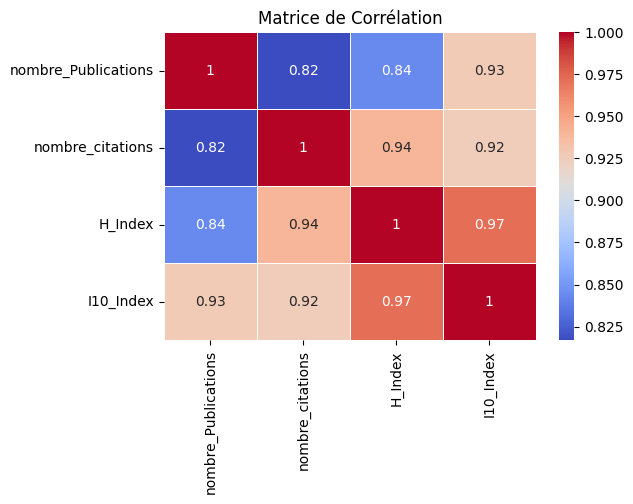

In [52]:

data = df.drop('Chercheur', axis=1)

# Calcul de la matrice de corrélation
corr_matrix = data.corr()

# Création d'un heatmap avec Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Matrice de Corrélation")
plt.show()


Pour sélectionner les variables X et Y, on opte pour des variables présentant une corrélation étroite, approchant 1.

## Étape 3 : Nuage de points

In [21]:
# on choisit notre variable dépendante Y et notre variable indépendante X
X = df['nombre_citations']
Y = df['H_Index']

Un nuage de points est créé pour visualiser la relation entre (H_Index) et (nombre_citations). Le nuage de points est affiché avec des axes et une légende.

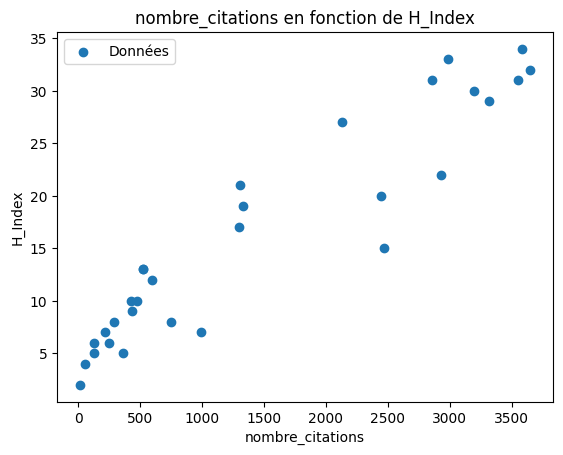

In [22]:

plt.scatter(X, Y, label="Données")
plt.xlabel('nombre_citations')
plt.ylabel('H_Index')
plt.title('nombre_citations en fonction de H_Index')
plt.legend()
plt.show()


les points semblent alignés de manière linéaire, cela indiquer une relation linéaire positive (croissante) entre les variables. Cela suggère que la régression linéaire pourrait être un bon modèle pour ces données.

## Étape 4 : Ajustement du modèle de régression linéaire

Un modèle de régression linéaire simple est ajusté en utilisant la méthode des moindres carrés ordinaires (OLS) de la bibliothèque statsmodels.

In [23]:
# on ajoute la constante de régression à notre variable indépendante X
X = sm.add_constant(X)

# Créer le modèle de régression linéaire
model = sm.OLS(Y, X).fit()

## Étape 5 : Affichage du nuage de points avec la droite de régression

Le nuage de points est affiché avec une droite de régression (en rouge) qui représente la relation linéaire entre (H_Index) et (nombre_citations)

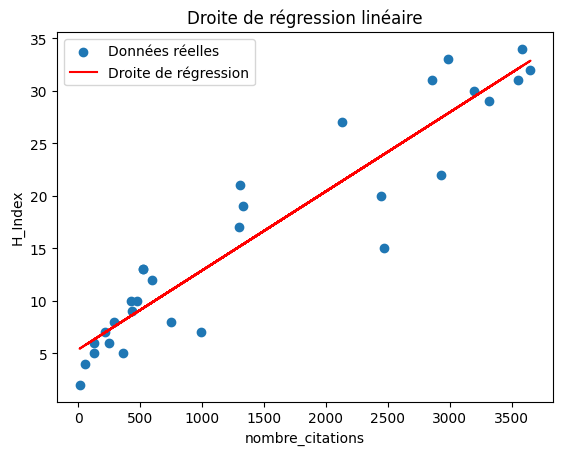

In [24]:
# Faire des prédictions
predictions = model.predict(X)

# Tracer les points de données et la droite de régression
plt.scatter(X['nombre_citations'], Y, label="Données réelles")
plt.plot(X['nombre_citations'], predictions, color='red', label='Droite de régression')
plt.title("Droite de régression linéaire") 
plt.xlabel("nombre_citations")
plt.ylabel("H_Index")
plt.legend()
plt.show()


 la droite de régression suit bien la tendance des points de données réels, cela suggère que le modèle capture correctement la relation linéaire entre la caractéristique d'entrée et la variable dépendante ("H_Index" dans ce cas).

## Étape 6 : Tests de régression

`Plusieurs tests sont effectués pour évaluer la qualité du modèle de régression :`


- Le test de Durbin-Watson est utilisé pour détecter l'autocorrélation des résidus.
<!-- - Le test de White est utilisé pour détecter l'hétéroscédasticité des résidus.  -->
- Le test de normalité de Shapiro-Wilk est utilisé pour évaluer la normalité des résidus.

In [25]:
# Calculer les résidus
residuals = model.resid

# Test de Durbin-Watson
dw_test = sms.durbin_watson(residuals)
print("Test de Durbin-Watson :", dw_test)

# Interprétation du test
if 1.5 < dw_test < 2.5:
    print("Pas d'autocorrélation positive ou négative des résidus. c'est à dire que les résidus sont indépendants, en d'aures termes, il n'y a pas de corrélation entre les résidus.")
else:
    print("Autocorrélation possible des résidus.")


Test de Durbin-Watson : 2.432130097771795
Pas d'autocorrélation positive ou négative des résidus. c'est à dire que les résidus sont indépendants, en d'aures termes, il n'y a pas de corrélation entre les résidus.


In [27]:
# Test de normalité de Shapiro-Wilk
shapiro_test_statistic, shapiro_test_p_value = shapiro(model.resid)

print("Test de Shapiro-Wilk - Statistique du test:", shapiro_test_statistic)
print("Test de Shapiro-Wilk - Valeur p:", shapiro_test_p_value)

# Interprétation du test
if shapiro_test_p_value > 0.05:
    print("Normalite des residus.")
else:
    print("Non-normalité significative des résidus détectée.")

Test de Shapiro-Wilk - Statistique du test: 0.976029098033905
Test de Shapiro-Wilk - Valeur p: 0.7130305767059326
Normalite des residus.


## Étape 7 : Histogramme des résidus avec courbe de distribution normale

Un histogramme des résidus est affiché pour visualiser leur distribution. Il est superposé avec une courbe de distribution normale pour évaluer la normalité des résidus.

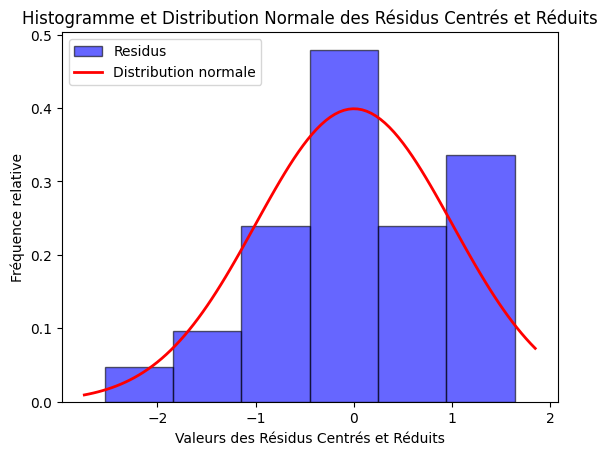

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Calcul des résidus centrés et réduits
residuals = model.resid
residuals_mean = residuals.mean()
residuals_std = residuals.std()

# Centrer et réduire les résidus
centered_resid = (residuals - residuals_mean)
standardized_resid = centered_resid / residuals_std

# Histogramme des résidus centrés et réduits avec courbe de distribution normale
plt.hist(standardized_resid, bins=6, color='blue', edgecolor='black', density=True, alpha=0.6, label='Residus')

mu, std = 0, 1  # Moyenne et écart-type pour une distribution normale centrée et réduite
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, label='Distribution normale', color='red')

plt.title('Histogramme et Distribution Normale des Résidus Centrés et Réduits')
plt.xlabel('Valeurs des Résidus Centrés et Réduits')
plt.ylabel('Fréquence relative')
plt.legend()
plt.show()


l'histogramme des résidus suit approximativement la forme de la distribution normale, cela suggère que les résidus sont normalement distribués
Une distribution normale des résidus est un indicateur positif pour la validité des résultats de la régression linéaire.

## Étape 8 : Calcul de l'Erreur quadratique moyenne (MSE).

In [29]:
# Calculer les valeurs prédites par le modèle de régression
predictions = model.predict(X)

# Calculez l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(Y, predictions)

# Affichez le MSE
print("l'Erreur quadratique moyenne = ", mse)
print("Cela signifie que, en moyenne, chaque prédiction de notre modèle est éloignée de la valeur réelle de", round(mse, 2), "unités")

l'Erreur quadratique moyenne =  12.082342144665004
Cela signifie que, en moyenne, chaque prédiction de notre modèle est éloignée de la valeur réelle de 12.08 unités



## Étape 9 : Coefficient de détermination (R²).

In [30]:
from sklearn.metrics import r2_score

predictions = model.predict(X)
# Calculez le coefficient de détermination (R2) 
r_squared = r2_score(Y, predictions)

# Affichez le R2
print("Coefficient de détermination = ", r_squared)

Coefficient de détermination =  0.8837789328139187


Un coefficient de détermination (R²) de 0.88 indique que notre modèle de régression linéaire explique environ 88.37% de la variance totale de la variable dépendante.
R² est proche de 1 Donc "H_Index"(Y) est bien expliquée  par "nombre_citations" (X) 

## Étape 10 : Résumé du modèle

Le résumé du modèle de régression linéaire est affiché, montrant les coefficients, les statistiques de test et d'autres informations liées au modèle.

In [31]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                H_Index   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     212.9
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           1.30e-14
Time:                        20:34:55   Log-Likelihood:                -79.944
No. Observations:                  30   AIC:                             163.9
Df Residuals:                      28   BIC:                             166.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.3618      0.992  


Coefficients du modèle :

`constante (const)` : 5.3618. C'est la valeur attendue de la variable dépendante lorsque toutes les variables indépendantes sont égales à zéro.

`nombre_citations` : 0.0075. Pour chaque unité d'augmentation de la variable indépendante "nombre_citations", la variable dépendante "H_Index" augmente de 0.0075, toutes choses égales par ailleurs.

Test Durbin-Watson : Mesure l'autocorrélation des résidus. Une valeur de 2.432 suggère qu'il y a peu d'autocorrélation positive dans les résidus.


**Conclusion**
Le modèle semble être statistiquement significatif, avec un R² de 0.884 indiquant une bonne capacité à expliquer la variance de la variable dépendante. Les coefficients individuels sont tous significatifs, et les tests de distribution des résidus montrent des résultats généralement satisfaisants.

# Partie 2: Régression linéaire multiple

## Étape 1 : Sélection des variables.

In [32]:
# Récupérer l'ensemble des valeurs de la variable cible
Y1 = df["H_Index"]

# Récupérer les variables prédictives (on en a 2)
X1 = df[['nombre_citations','nombre_Publications']]


## Étape 2 : Nuage de points

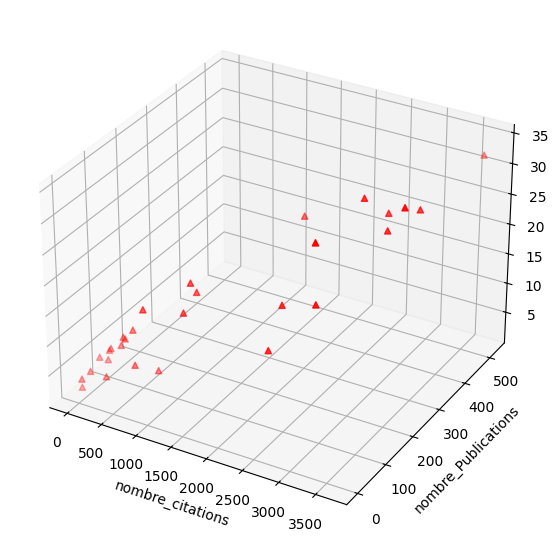

In [33]:

# tracer la figure en 3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter(X1["nombre_citations"], X1["nombre_Publications"], Y1, c='r', marker='^')

# ajouter les labels
ax.set_xlabel('nombre_citations')
ax.set_ylabel('nombre_Publications')
ax.set_zlabel('H_Index)')
 
plt.show()


## Étape 3 : Ajustement du modèle de régression linéaire

In [34]:

# on ajoute la constante de régression à notre variable indépendante X
X = sm.add_constant(X1)
model2 = sm.OLS(Y1, X).fit()

## Étape 4 : Affichage du nuage de points avec la droite de régression.

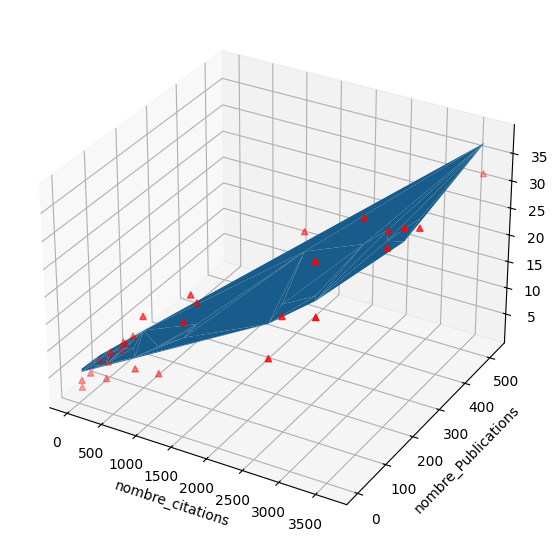

In [35]:

# Effectuez les prédictions
Y_predict = model2.predict(X)

# Créez une figure avec une taille personnalisée
fig = plt.figure(figsize=(15, 10))

# Ajoutez un sous-graphique 3D
ax = fig.add_subplot(1, 2, 1, projection='3d')

# Nuage de points avec les données réelles
ax.scatter(df["nombre_citations"], df["nombre_Publications"], df["H_Index"], c='r', marker='^')

# Ajoutez des étiquettes aux axes
ax.set_xlabel('nombre_citations')
ax.set_ylabel('nombre_Publications')
ax.set_zlabel('H_Index)')

# Tracé de la surface triangulée avec les prédictions
ax.plot_trisurf(df["nombre_citations"], df["nombre_Publications"], Y_predict)

# Affichez la figure
plt.show()

## Interpretation : 
Cette figure graphique montre une corrélation entre le nombre de citations, le nombre de publications et l'index h. 
Les données semblent forment une surface linéaire ce qui signifie que les variables sont corrélées linéairement

## Étape 5 : Tests de régression

Plusieurs tests sont effectués pour évaluer la qualité du modèle de régression :
 1. Le test de Durbin-Watson est utilisé pour détecter l'autocorrélation des résidus. 
 2. Le test de White est utilisé pour détecter l'hétéroscédasticité des résidus. 
 3. Le test de normalité de Shapiro-Wilk est utilisé pour évaluer la normalité des résidus.

In [44]:

# Test de Durbin-Watson

# Calculer les résidus
residuals = model2.resid

# Test de Durbin-Watson
dw_test = sms.durbin_watson(residuals)
print("Test de Durbin-Watson :", dw_test)

# Interprétation du test
if 1.5 < dw_test < 2.5:
    print("Pas d'autocorrélation positive ou négative des résidus. c'est à dire que les résidus sont indépendants, en d'aures termes, il n'y a pas de corrélation entre les résidus.")
else:
    print("Autocorrélation possible des résidus. c'est à dire qu'il y a une corrélation entre les résidus.")



Test de Durbin-Watson : 2.321546650060654
Pas d'autocorrélation positive ou négative des résidus. c'est à dire que les résidus sont indépendants, en d'aures termes, il n'y a pas de corrélation entre les résidus.


In [45]:
# Test de White pour l'hétéroscédasticité
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test_statistic, bp_test_p_value, fstat, f_p_value= het_breuschpagan(model2.resid, X)

print(f"Statistique de Breusch-Pagan -- statistique du test : {bp_test_statistic:.4f}")
print(f"Statistique de Breusch-Pagan -- valeur p : {bp_test_p_value:.4f}")

if f_p_value < 0.05:
    print("hétéroscédasticité détéctée : la variance des résidus n'est pas constante")
else:
    print("Aucune hétéroscédasticité significative détéctée : la variance des résidus est constante")

Statistique de Breusch-Pagan -- statistique du test : 4.5659
Statistique de Breusch-Pagan -- valeur p : 0.1020
Aucune hétéroscédasticité significative détéctée : la variance des résidus est constante


In [46]:
# Test de normalité de Shapiro-Wilk
shapiro_test_statistic, shapiro_test_p_value = stats.shapiro(model2.resid)

print(f"Statistique de shapiro-wilk -- statistique du test : {shapiro_test_statistic:.4f}")
print(f"Statistique de shapiro-wilk -- valeur p : {shapiro_test_p_value:.4f}")

if shapiro_test_p_value < 0.05:
    print("les résidus ne suivent pas une distribution normale.")
else:
    print("les résidus semblent suivre une distribution normale.")



Statistique de shapiro-wilk -- statistique du test : 0.9796
Statistique de shapiro-wilk -- valeur p : 0.8158
les résidus semblent suivre une distribution normale.


## Étape 6 : Calcul de l'Erreur quadratique moyenne (MSE).

In [40]:
Y2_predict = model2.predict(X)

# Calculez l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(Y1, Y2_predict)

# Affichez le MSE
print("l'Erreur quadratique moyenne = ", mse)

l'Erreur quadratique moyenne =  10.271888608674011


Cela signifie que, en moyenne, chaque prédiction de notre modèle est éloignée de la valeur réelle de 4.50 unités


## Étape 7 : Coefficient de détermination (R²).

In [41]:
from sklearn.metrics import r2_score

# Calculez l'erreur quadratique moyenne (MSE)
r_squared = r2_score(Y1, Y2_predict)

# Affichez le MSE
print("Coefficient de détermination = ", r_squared)

Coefficient de détermination =  0.901193837931185


Un coefficient de détermination (R²) de 0.90 indique que notre modèle de régression linéaire explique environ 90.12% de la variance totale de la variable dépendante.
R² est proche de 1 Donc "H_Index"(Y) est bien expliquée  par "nombre_citations et nombre_Publications" (X) 

## Étape 10 : Résumé du modèle

Le résumé du modèle de régression linéaire est affiché, montrant les coefficients, les statistiques de test et d'autres informations liées au modèle.

In [42]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                H_Index   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     123.1
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           2.69e-14
Time:                        20:34:57   Log-Likelihood:                -77.509
No. Observations:                  30   AIC:                             161.0
Df Residuals:                      27   BIC:                             165.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.2348    

#### un exemple

In [51]:
# un example 
import statsmodels.api as sm

# Les caractéristiques de ahmed 
ahmed_features = {'nombre_citations': 200, 'nombre_Publications': 150}

# Création d'un DataFrame pour Bob
ahmed_data = pd.DataFrame([ahmed_features])

# Ajout de la constante pour l'intercept
ahmed_data = sm.add_constant(ahmed_data)

# Prédiction pour Bob
ahmed_features = model.predict(ahmed_data)

print("La prédiction de l'indice h pour Bob est :", ahmed_features[0])


La prédiction de l'indice h pour Bob est : 1073.4895092896181


# Conclusion 

Les résultats de la régression suggèrent une relation significative entre l'index h et les variables examinées ( le nombre de citations, le nombre de publications ).

Cette corrélation met en lumière l'importance de ces variables dans la détermination de l'influence académique d'un chercheur, notamment en soulignant l'impact des citations reçues et du volume de publications sur la création de cet indice h significatif.